# Titanic -  EDA and Machine Learning

Objective : Use Machine Learning to create a model that predicts which passengers survived the Titanic shipwreck

Data Given: 
            PassengerId;
            
            Survived: 0 = No, 1 = Yes
            Pclass : 1 = 1st, 2 = 2nd, 3 = 3rd
            Name;
            Sex;
            Age;
            SibSp;
            Parch;
            Ticket;
            Fare;
            Cabin
            Embarked : C = Cherbourg, Q = Queenstown, S = Southampton
  

## Approach: 

            1. Exploratory Data Analysis
            2. Feature Engineering
            3. Model building

In [281]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
import re
import numpy as np
#from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [216]:
#import Train and Test sets
# Test sets will be used to fill the Null data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [217]:
#Sample data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
# Data types, Missing values, features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Note:
1. We can see that there are missing values in "Age", "Cabin" and "Embarked" features.


In [219]:
# Description of the data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visual Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

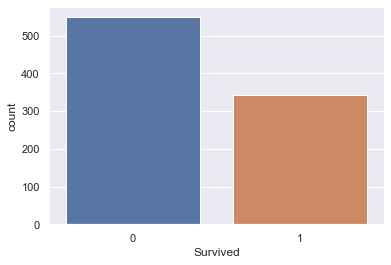

In [220]:
#visual plot Survived & Not Survived
sns.countplot(x = "Survived", data = df_train)

In [221]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Note: 
Obviously, Less number of people survived in train set

## Visual EDA on feature vectors
### 1. Sex
Survived split over feature "Sex"

<AxesSubplot:xlabel='Sex', ylabel='count'>

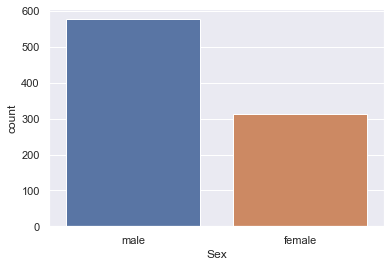

In [222]:
#Sex
sns.countplot(x = "Sex", data = df_train)

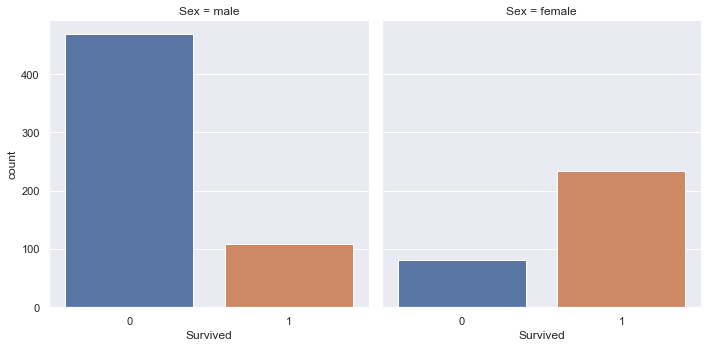

In [223]:
#women vs men

sns.catplot(x='Survived',col = 'Sex', kind = 'count',data = df_train)

Note:
    Women are more likely to survive than men

In [224]:
#Number of Women and Men Survived
df_train.groupby(['Sex']).Survived.sum()


Sex
female    233
male      109
Name: Survived, dtype: int64

In [225]:
df_train['Survived'].sum()

342

Note: Total number of people survived is 342 out of which 233 were Women and 109 are Men

### Proportion of Survivors by Sex

In [226]:
# % of the Women and Men survived

print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


Percentage of Women survived = 74.2% ; 
Percentage of Men Survived = 18.8%

### 2. Pclass
#### Survived split over the feature "Pclass"

<AxesSubplot:xlabel='Pclass', ylabel='count'>

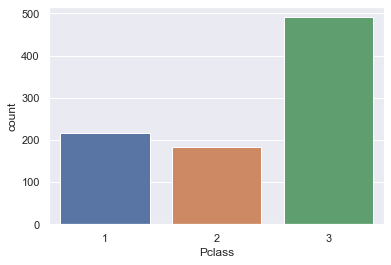

In [227]:
sns.countplot(x = "Pclass", data = df_train)

Note: 3rd class passengers are more in number

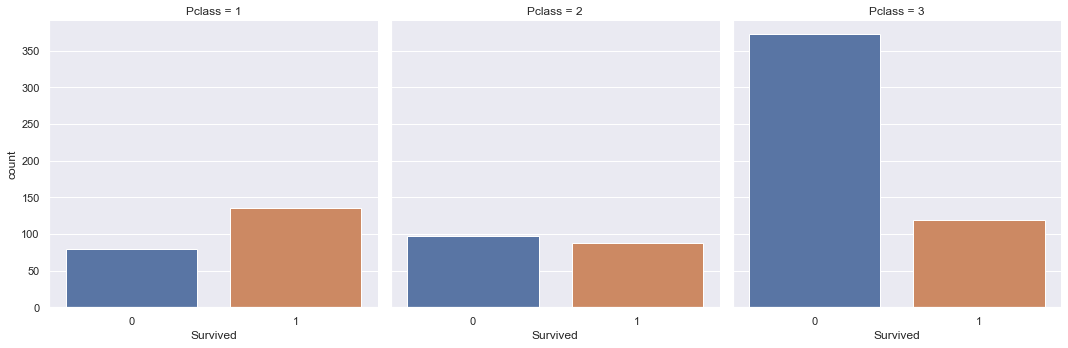

In [228]:
sns.catplot(x='Survived',col = 'Pclass', kind = 'count',data = df_train)

In [229]:
df_train.groupby(['Pclass']).Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Note: More number of people with 1st class ticket survived than the rest

### Proportion of Survivors by Class

In [230]:
print(df_train[df_train.Pclass == 1 ].Survived.sum()/df_train[df_train.Pclass == 1 ].Survived.count())
print(df_train[df_train.Pclass == 2 ].Survived.sum()/df_train[df_train.Pclass == 2 ].Survived.count())
print(df_train[df_train.Pclass == 3 ].Survived.sum()/df_train[df_train.Pclass == 3 ].Survived.count())

0.6296296296296297
0.47282608695652173
0.24236252545824846



### 3. Embarked
#### Survived split over the feature "Embarked"

<AxesSubplot:xlabel='Embarked', ylabel='count'>

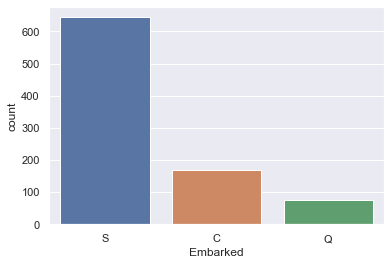

In [231]:
sns.countplot(x = "Embarked", data = df_train)

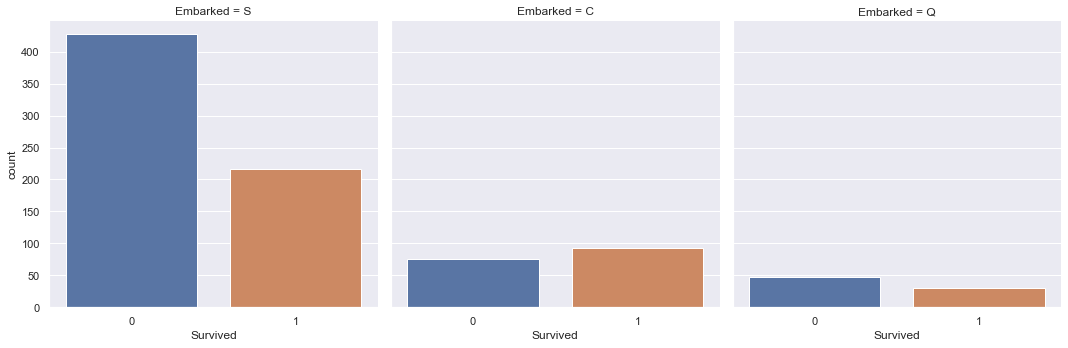

In [232]:
sns.catplot(x='Survived',col = 'Embarked', kind = 'count',data = df_train)

In [233]:
df_train.groupby(['Embarked']).Survived.sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

### Proportion of Survivors by Embarked list

In [234]:
print(df_train[df_train.Embarked == 'S' ].Survived.sum()/df_train[df_train.Embarked == 'S' ].Survived.count())
print(df_train[df_train.Embarked == 'C' ].Survived.sum()/df_train[df_train.Embarked == 'C' ].Survived.count())
print(df_train[df_train.Embarked == 'Q' ].Survived.sum()/df_train[df_train.Embarked == 'Q' ].Survived.count())

0.33695652173913043
0.5535714285714286
0.38961038961038963


## EDA on numeric variables

<AxesSubplot:xlabel='Fare', ylabel='Count'>

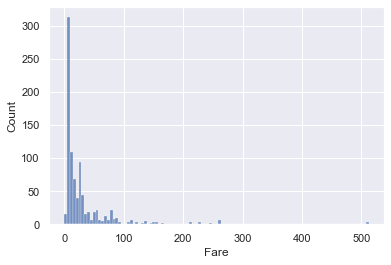

In [235]:
#histogram on Fare
#frequency distribution 

sns.histplot(x = "Fare", data = df_train)

In [236]:
#Histogram on Age column
# populate the missing ages 

df_train['Age'] = df_train.Age.fillna(df_train.Age.median())



In [237]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Age', ylabel='Count'>

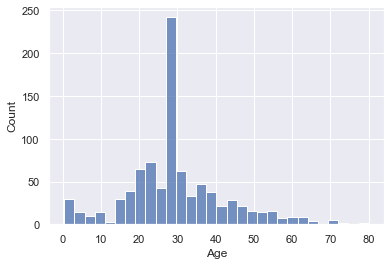

In [238]:
sns.histplot(x = "Age", data = df_train)

# First Machine Learning Model
## Logistic regression

In [239]:
#data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB





### For the first Machine Learning Model:

1. Store the Target variable

2. Select the columns : Pclass, Age, SibSp, Fare, Sex_male

In [270]:
#store target variable
survived_train = df_train.Survived

#drop the target variable from the data
data = df_train.drop(['Survived'], axis = 1)


In [271]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB



Note:

1. Encode the data with numbers: Convert the data "Male" and "female" to numbers

In [273]:
data = pd.get_dummies(data, columns = ['Sex'], drop_first = True)

In [274]:
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


### Note:

note that Sex column has been dropped and Sex_male has been added with 0s and 1s which implies that we have converted the string data to numbers


In [275]:
data = data[['Sex_male','Fare','Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  891 non-null    uint8  
 1   Fare      891 non-null    float64
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   SibSp     891 non-null    int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 28.8 KB


In [277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [278]:
X = data
y = survived_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [279]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred


array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1])

In [280]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

0.7864406779661017
[[152  31]
 [ 32  80]]


## Feature Engineering

In [313]:
# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

# View head
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Feature engineering: to Extract more information 

1. Consider the Name Column in the data

In [315]:
data.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Note: this columns contains strings that contain 'Title' such as 'Mr', 'Master' . we can use regular expressions to extract the Title

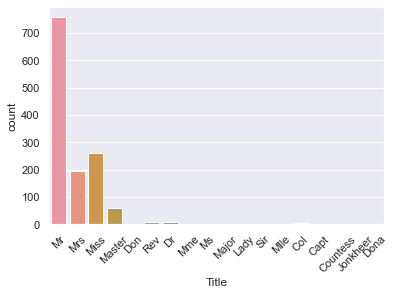

In [316]:
# Extract Title from Name, store in column and plot barplot
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

Note: 

There are several titles. Lets group them

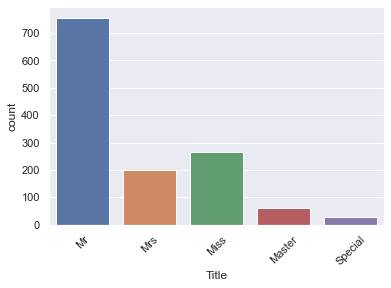

In [317]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [318]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


2. Consider Column "Cabin"

There are several missing values in Cabin Column which implies that being cabinless might tell us something about survival

In [319]:
# Did they have a Cabin?
data['Has_Cabin'] = ~data.Cabin.isnull()


data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


In [320]:
#drop the unnecessary columns
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,female,35.0,1,0,53.1000,S,Mrs,True
4,3,male,35.0,0,0,8.0500,S,Mr,False


In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Sex        1309 non-null   object 
 2   Age        1046 non-null   float64
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Fare       1308 non-null   float64
 6   Embarked   1307 non-null   object 
 7   Title      1309 non-null   object 
 8   Has_Cabin  1309 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 125.6+ KB


In [322]:
# Impute missing values for Age, Fare, Embarked
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare']= data.Fare.fillna(data.Fare.median())
data['Embarked'] = data['Embarked'].fillna('S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Sex        1309 non-null   object 
 2   Age        1309 non-null   float64
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Fare       1309 non-null   float64
 6   Embarked   1309 non-null   object 
 7   Title      1309 non-null   object 
 8   Has_Cabin  1309 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 125.6+ KB


Put the numerical data in to ranges using quantilecut function
q denotes the number of groups = 0,1,2,3

In [323]:

data['CatAge'] = pd.qcut(data.Age, q = 4, labels = False)
data['CatFare']= pd.qcut(data.Fare, q = 4, labels = False)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,22.0,1,0,7.2500,S,Mr,False,0,0
1,1,female,38.0,1,0,71.2833,C,Mrs,True,3,3
2,3,female,26.0,0,0,7.9250,S,Miss,False,1,1
3,1,female,35.0,1,0,53.1000,S,Mrs,True,2,3
4,3,male,35.0,0,0,8.0500,S,Mr,False,2,1


In [324]:
#dropping Age and Fare column
data = data.drop(['Age','Fare'], axis=1)
data = data.drop(['SibSp','Parch'], axis=1)


In [326]:
data.head()

,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,S,Mr,False,0,0
1,1,female,C,Mrs,True,3,3
2,3,female,S,Miss,False,1,1
3,1,female,S,Mrs,True,2,3
4,3,male,S,Mr,False,2,1


In [327]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,Pclass,Has_Cabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,False,0,0,1,0,1,0,1,0,0
1,1,True,3,3,0,0,0,0,0,1,0
2,3,False,1,1,0,0,1,1,0,0,0
3,1,True,2,3,0,0,1,0,0,1,0
4,3,False,2,1,1,0,1,0,1,0,0


In [328]:
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pclass         1309 non-null   int64
 1   Has_Cabin      1309 non-null   bool 
 2   CatAge         1309 non-null   int64
 3   CatFare        1309 non-null   int64
 4   Sex_male       1309 non-null   uint8
 5   Embarked_Q     1309 non-null   uint8
 6   Embarked_S     1309 non-null   uint8
 7   Title_Miss     1309 non-null   uint8
 8   Title_Mr       1309 non-null   uint8
 9   Title_Mrs      1309 non-null   uint8
 10  Title_Special  1309 non-null   uint8
dtypes: bool(1), int64(3), uint8(7)
memory usage: 83.4 KB


### Build the new ML Model

In [329]:
# Split into test.train
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

# Transform into arrays for scikit-learn
X = data_train.values
test = data_test.values
y = survived_train.values

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [331]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [332]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

0.8
[[150  25]
 [ 34  86]]
